In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
loan_df = pd.read_csv('D:\\Data Science Course\\Datasets\\loan\\loan.csv')#low_memory = False
loan_df

C:\Users\sunil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
loan_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

### The 'Target Column' in this data set is 'loan_status'. 
            'loan_status' has 3 unique values. 
                    'Fully Paid' tells us the loan is clear.(customer has paid the laon.)
                    'Charged Off' tells us that the amount of debt is unlikely to be collected.
                    'Current' tells us that, the the loan amount associated with it is currently ongoing.
                           There is no use of the data with 'Current' status for analysis. We will remove it.

# 1) Data Distribution

In [10]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.0,516221.0,665665.0,837755.0,1077501.0
member_id,39717.0,850463.559408,265678.307421,70699.0,666780.0,850812.0,1047339.0,1314167.0
loan_amnt,39717.0,11219.443815,7456.670694,500.0,5500.0,10000.0,15000.0,35000.0
funded_amnt,39717.0,10947.713196,7187.238670,500.0,5400.0,9600.0,15000.0,35000.0
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.0,5000.0,8975.0,14400.0,35000.0
...,...,...,...,...,...,...,...,...
tax_liens,39678.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
tot_hi_cred_lim,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bal_ex_mort,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bc_limit,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


###### NOTE FOR SELF :  (Remember)
    Code :- pd.set_option('display.max_rows',None)
    
        This Code is for display all the rows.
        Using this while printing all dataset leads to system hang.(When dataset contains large number of rows.)
    
    Code :- pd.set_option('display.max_columns',None)
        This Code is for display all the columns.

# 2) Missing Value Analysis

In [12]:
#Use function for operation

loan_df.isna().sum()/loan_df.shape[0]*100 #

## Missing Value Remove


##### There are too many coloumns with missing values greater than 30%. so lets make list of these columns so we can give them as an argument for labels while dropping.

        Iterate over coloumns in dataset and append the coloumn in 'missing' if it coloumns have 30% or more missing values

In [13]:
missing = []

In [14]:
for col in loan_df.columns:
    if loan_df[col].isna().sum()/loan_df.shape[0]*100 >30:
        missing.append(col)

In [15]:
missing

['desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_pa

In [16]:
loan_df.drop(labels=missing,axis = 1,inplace = True)

In [17]:
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [18]:
loan_df.isna().sum()/loan_df.shape[0]*100 

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [19]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.00,516221.00,665665.000000,8.377550e+05,1.077501e+06
member_id,39717.0,850463.559408,265678.307421,70699.00,666780.00,850812.000000,1.047339e+06,1.314167e+06
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,1.440000e+04,3.500000e+04
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,4.307800e+02,1.305190e+03
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,8.230000e+04,6.000000e+06
dti,39717.0,13.315130,6.678594,0.00,8.17,13.400000,1.860000e+01,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.00,0.00,0.000000,0.000000e+00,1.100000e+01
inq_last_6mths,39717.0,0.869200,1.070219,0.00,0.00,1.000000,1.000000e+00,8.000000e+00


###### Only coloumns with missing values
        
           New Learn: 
                   This is how we can make list of columns with respect to missing value percentage. (Using only pandas functions)

In [20]:
missing = loan_df.isna().sum()/loan_df.shape[0]*100 
missing[missing!=0]

emp_title                     6.191303
emp_length                    2.706650
title                         0.027696
revol_util                    0.125891
last_pymnt_d                  0.178765
last_credit_pull_d            0.005036
collections_12_mths_ex_med    0.140998
chargeoff_within_12_mths      0.140998
pub_rec_bankruptcies          1.754916
tax_liens                     0.098195
dtype: float64

#### Analysing 'emp_title' variable

In [21]:
pd.set_option('display.max_columns',None)

In [22]:
loan_df.iloc[0:20,:] #First range(inclusive) is for rows and second range(inclusive) is for coloumns

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,f,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,f,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,f,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,15

In [23]:
loan_df['emp_title'].unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

In [24]:
len(loan_df['emp_title'].unique())

28821

### Insights for 'emp_title'

emp_title have 6.19% of missing values.

It is a categorical variable which have more than 28000 categories.

There is no relation between 'emp_title' and other variables to fill out those values.

'So we will remove rows with missing value of 'emp_title'.

###### Removing rows with missing value of 'emp_title'.
        
###### <font color = 'red'>New Learn</font>:
                   pd.dropna()  :-
                           It removes missing values.
                        
                        Parameters: 
                            1) axis: 0 or 1/ index or columns
                            2) how : 'any' or 'all'
                            3) subset : array-like
                                        if you are dropping rows these would be a list of columns to include.
                               
                       

In [25]:
loan_df.dropna(axis=0,subset=['emp_title'],inplace=True)

In [26]:
loan_df['emp_title'].isna().sum()

0

In [27]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,f,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [28]:
missing = loan_df.isna().sum()/loan_df.shape[0]*100 
missing[missing!=0]

emp_length                    0.150303
title                         0.024156
revol_util                    0.123463
last_pymnt_d                  0.171775
collections_12_mths_ex_med    0.126147
chargeoff_within_12_mths      0.126147
pub_rec_bankruptcies          1.755328
tax_liens                     0.085888
dtype: float64

#### 'emp_length'
           
           This is more of a categorical variable than discrete variable. 
           This coloumn have 0.15% missing values. Total 56 values.
           lets find out is there any relation between other columns and 'emp_length' to fill values.
           if not, we can simply remove rows with missing values of 'emp_length'.
           

In [29]:
loan_df['emp_length'].isna().sum()

56

In [30]:
len(loan_df['emp_length'].unique())

12

In [31]:
loan_df[['emp_length','loan_amnt','annual_inc']][:20]

,emp_length,loan_amnt,annual_inc
1,< 1 year,2500,30000.00
3,10+ years,10000,49200.00
4,1 year,3000,80000.00
5,3 years,5000,36000.00
6,8 years,7000,47004.00
7,9 years,3000,48000.00
9,< 1 year,5375,15000.00
10,5 years,6500,72000.00
11,10+ years,12000,75000.00
12,< 1 year,9000,30000.00


In [32]:
loan_df['emp_length'].value_counts()

10+ years    8535
2 years      4273
< 1 year     4201
3 years      3982
4 years      3357
5 years      3177
1 year       3134
6 years      2158
7 years      1722
8 years      1435
9 years      1228
Name: emp_length, dtype: int64

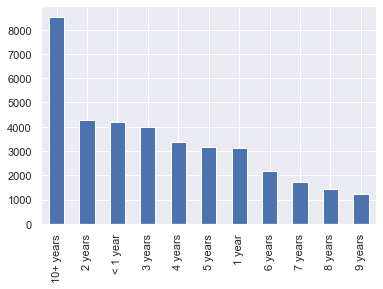

In [33]:
loan_df['emp_length'].value_counts().plot.bar()

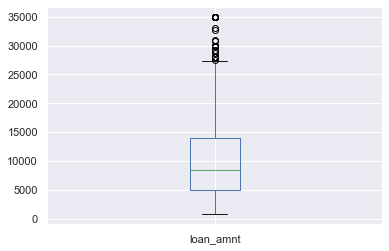

In [34]:
loan_df[ (loan_df['emp_length']=='1 year')]['loan_amnt'].plot.box()

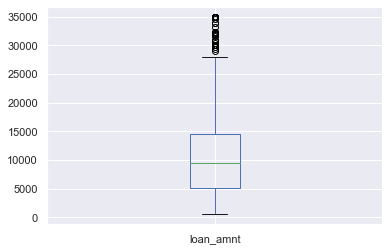

In [35]:
loan_df[ (loan_df['emp_length']=='3 years')]['loan_amnt'].plot.box()

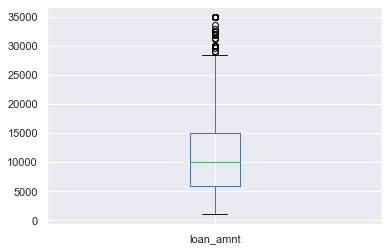

In [36]:
loan_df[ (loan_df['emp_length']=='5 years')]['loan_amnt'].plot.box()

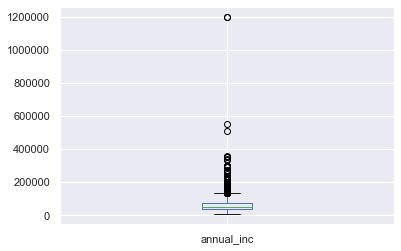

In [37]:
loan_df[ (loan_df['emp_length']=='1 year')]['annual_inc'].plot.box()

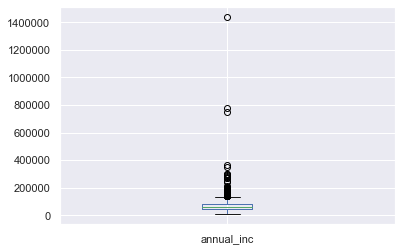

In [38]:
loan_df[ (loan_df['emp_length']=='7 years')]['annual_inc'].plot.box()

#### Checking Median annual income of customer as per  range of 'emp_length'.

In [39]:
loan_df[ (loan_df['emp_length']=='1 year')]['annual_inc'].median()

52000.0

Creating list of uniques in 'emp_length' without 'nan'.

In [40]:
emp_range = loan_df['emp_length'].unique()[:-1]
emp_range

array(['< 1 year', '10+ years', '1 year', '3 years', '8 years', '9 years',
       '5 years', '4 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [41]:
for uni in emp_range:
    print('Median annual income of emp with',uni,'length is   ',loan_df[ (loan_df['emp_length']==uni)]['annual_inc'].median())

Median annual income of emp with < 1 year length is    50000.0
Median annual income of emp with 10+ years length is    69996.0
Median annual income of emp with 1 year length is    52000.0
Median annual income of emp with 3 years length is    55000.0
Median annual income of emp with 8 years length is    60000.0
Median annual income of emp with 9 years length is    64000.0
Median annual income of emp with 5 years length is    57840.0
Median annual income of emp with 4 years length is    57996.0
Median annual income of emp with 6 years length is    60000.0
Median annual income of emp with 2 years length is    52000.0
Median annual income of emp with 7 years length is    60000.0


## Missing Value Impute

### Insights for 'emp_length' 
            
            As we go to the higher emp_length the median annual income is increasing.
                i.e '< 1 years' have least median annual income. and '10+ year' have highest meadian annual income.

##### Imputing missing values of 'emp_length'
        
        First we will make a dictionary of median annual incomes for each unique element in emp_length.
                i.e dict = { 'median_annual_income' : 'unique_emp_length' } 
        Then we will fill missing values of emp_length with respect to annual income.
        
###### <font color = red> NOTE :   </font>Missing value percentage is very samll in this column. Generally we should remove rows with null values in this type of scenario. But here we found a intresteing relationship between columns. So we will fill missing value for practice.

In [42]:
#loan_df[loan_df['emp_length'].isna()]

In [43]:
#loan_df[loan_df['emp_length'].isna()].groupby(loan_df['annual_inc']<=50000)

In [44]:
#loan_df[loan_df['emp_length'].isna()][loan_df['annual_inc']<50000]

In [45]:
#loan_df.loc[loan_df['emp_length'].isna(),'emp_length'][loan_df['annual_inc']<=50000] = "< 1 year"#.fillna(value = "< 1 year",inplace=True)# = '< 1 years'

###### Filling  values for  '< 1 year'

In [46]:
loan_df.loc[(loan_df['emp_length'].isna()) & (loan_df['annual_inc']<=50000),'emp_length'] = "< 1 year"

#### New Learn: (Rough)
            
            'While filling missing values in column using condition which is working with another column', we have to use following syntax:
                pd.loc[ (pd['column_to_fill'].isna()) & (pd['column_2]condition),'coloumn_to_fill'] = value
                
      **** if we have multiple conditions we can execute it by seperating them using & or || (as per our requirements.) ****

In [47]:
loan_df['emp_length'].isna().sum()

20

###### Filling  values for  '1 year'
            
            Median annual_inc for '1 year' and '2 year' are equal. So for that value we'll only use '1 year' to fill.
                This will not distrupt our data, because the number of missing values is too small.

In [48]:
loan_df.loc[(loan_df['emp_length'].isna()) & (loan_df['annual_inc']<=52000),'emp_length'] = "< 1 year"

In [49]:
loan_df['emp_length'].isna().sum()

17

###### Filling  values for  '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years' simultaneously

In [50]:
loan_df.loc[(loan_df['emp_length'].isna()) & (loan_df['annual_inc']<=55000),'emp_length'] = "3 years"

In [51]:
loan_df['emp_length'].isna().sum()

15

In [52]:
loan_df['emp_length'].value_counts()

10+ years    8535
2 years      4273
< 1 year     4240
3 years      3984
4 years      3357
5 years      3177
1 year       3134
6 years      2158
7 years      1722
8 years      1435
9 years      1228
Name: emp_length, dtype: int64

'The difference between Median annual_inc for '4 years' and '5 years' is very small.'
    So we will use '5 years' for filling.

In [53]:
loan_df.loc[(loan_df['emp_length'].isna()) & (loan_df['annual_inc']<=58000),'emp_length'] = "5 years"

In [54]:
loan_df['emp_length'].isna().sum()

15

 Median annual_inc for '6 years','7 years' and '8 years' are equal. So for that value we'll only use '7 years' to fill.

In [55]:
loan_df.loc[(loan_df['emp_length'].isna()) & (loan_df['annual_inc']<=60000),'emp_length'] = "7 years"

In [56]:
loan_df['emp_length'].isna().sum()

12

In [57]:
loan_df.loc[(loan_df['emp_length'].isna()) & (loan_df['annual_inc']<=64000),'emp_length'] = "9 years"

In [58]:
loan_df['emp_length'].isna().sum()

12

"Final filling for '10+ years'."

In [59]:
loan_df.loc[(loan_df['emp_length'].isna()) & (loan_df['annual_inc']>64000),'emp_length'] = "10+ years"

In [60]:
loan_df['emp_length'].isna().sum()

0

In [61]:
missing = loan_df.isna().sum()/loan_df.shape[0]*100 
missing[missing!=0]

title                         0.024156
revol_util                    0.123463
last_pymnt_d                  0.171775
collections_12_mths_ex_med    0.126147
chargeoff_within_12_mths      0.126147
pub_rec_bankruptcies          1.755328
tax_liens                     0.085888
dtype: float64

In [62]:
loan_df[['title','revol_util','last_pymnt_d','collections_12_mths_ex_med','chargeoff_within_12_mths','pub_rec_bankruptcies','tax_liens']]

,title,revol_util,last_pymnt_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
1,bike,9.40%,Apr-13,0.0,0.0,0.0,0.0
3,personel,21%,Jan-15,0.0,0.0,0.0,0.0
4,Personal,53.90%,May-16,0.0,0.0,0.0,0.0
5,My wedding loan I promise to pay back,28.30%,Jan-15,0.0,0.0,0.0,0.0
6,Loan,85.60%,May-16,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
39710,My Credit Card Loan,0.60%,Jul-10,NaN,NaN,NaN,NaN
39711,Reduce Credit Card Debt,23%,Jul-10,NaN,NaN,NaN,NaN
39712,Home Improvement,13.10%,Jul-10,NaN,NaN,NaN,NaN
39713,Retiring credit card debt,26.90%,Jul-10,NaN,NaN,NaN,NaN


In [63]:
for col in ['title','revol_util','last_pymnt_d','collections_12_mths_ex_med','chargeoff_within_12_mths','pub_rec_bankruptcies','tax_liens']:
    print('Unique',col,':',len(loan_df[col].unique()))

Unique title : 18418
Unique revol_util : 1083
Unique last_pymnt_d : 102
Unique collections_12_mths_ex_med : 2
Unique chargeoff_within_12_mths : 2
Unique pub_rec_bankruptcies : 4
Unique tax_liens : 2


## Missing Value Remove

The columns 'collections_12_mths_ex_med', 'chargeoff_within_12_mths' and 'tax_liens' has either value of '0' or 'nan'. 
These categorical columns will not be useful for analysis. They are not showing any relation with target column.
So we will remove these columns.

In [64]:
loan_df.shape

(37258, 53)

In [65]:
loan_df.drop(labels = ['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'],axis = 1, inplace = True)

In [66]:
loan_df.shape

(37258, 50)

Lets look for column 'pub_rec_bankruptcies'

In [67]:
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    35090
1.0     1507
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

This is a categorical column in which most of the rows contain value 0.
We will remove the rows with missing value of 'pub_bankrupcies' because it is hard to find its relationship with other columns.
And removing the rows with missing value will not affect our data.

In [68]:
loan_df.dropna(axis=0,subset=['pub_rec_bankruptcies'],inplace=True)

In [69]:
loan_df.shape

(36604, 50)

In [70]:
missing = loan_df.isna().sum()/loan_df.shape[0]*100 
missing[missing!=0]

title           0.024587
revol_util      0.125669
last_pymnt_d    0.174844
dtype: float64

In [71]:
len(loan_df['title'].unique())

18032

In [72]:
len(loan_df['revol_util'].unique())

1083

In [73]:
len(loan_df['last_pymnt_d'].unique())

98

Now, we have 3 columns 'title', 'revol_util' and 'last_pymnt_d' which have a very small % of missing value of 0.02%, 0.13% and 0.18% respectively.

        'title' gives the title of the loan specified by the borrower in the application.
        'revol_util' gives the revolving line utelization and
        'last_pymnt_d' gives the month in which last payment was received.

As the percentage of missing values of these columns is very small.
So we will remove rows with missing values in these columns.

In [74]:
loan_df.shape

(36604, 50)

In [75]:
loan_df.dropna(axis=0,subset=['title'],inplace=True)
loan_df.dropna(axis=0,subset=['revol_util'],inplace=True)
loan_df.dropna(axis=0,subset=['last_pymnt_d'],inplace=True)

In [76]:
loan_df.shape

(36489, 50)

In [77]:
loan_df.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv 

# Removing Unnecessary Columns.

   <font color = red> NEW LEARN :-</font>
                   1. nunique()
                   2. sort_values()
           
           ♦ pd.series.nunique() : Return number of unique elements in the object. Excludes NA values by default.

           ♦ pd.data_frame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last'):
                       This sort by the values along the axis we provide.
                       Above are default values of its parameters.

In [78]:
loan_df.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    864
funded_amnt                 1025
out_prncp                   1065
out_prncp_

##### There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to the analysis i.e. columns which does not have the content which is important to analyse target column('loan_status').

1. id :is a random number given to the loan, does not contribute to analysis.
2. member_id : is a random number given to the member, does not contribute to analysis.
3. pymnt_plan : value for entire dataset is 'n', therefore can be removed.
4. url : is a URL for LC page for corresponding to each memberid, nothing to do with loan status.
5. zip_code : first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis
6. initial_list_status : value for entire dataset is 'f' out of the possible values, therefore can be removed.
7. policy_code : value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.
8. application_type : value for entire dataset is 'INDIVIDUAL',therefore nothing to contribute for analysis.we so can be removed.
9. acc_now_delinq : value for entire dataset is '0', therefore can be removed.
10. delinq_amnt : value for entire dataset is '0', therefore can be removed.
11. funded_amnt : value for this column is almost equivalent to loan_amnt.
12. funded_amnt_inv : value for this column is almost equivalent to funded_amnt.

In [79]:
loan_df.shape

(36489, 50)

In [80]:
unnecessary_cols = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
loan_df.drop(labels = unnecessary_cols, axis = 1, inplace = True)

In [81]:
loan_df.shape

(36489, 38)

In [82]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,36489.0,11302.745348,7434.094395,500.00,5600.000000,10000.00000,15000.00000,3.500000e+04
installment,36489.0,326.044940,207.386167,16.08,168.820000,283.20000,431.94000,1.305190e+03
annual_inc,36489.0,69267.822285,63509.515769,4000.00,42000.000000,60000.00000,83000.00000,6.000000e+06
dti,36489.0,13.442422,6.644938,0.00,8.350000,13.53000,18.69000,2.999000e+01
delinq_2yrs,36489.0,0.146154,0.492254,0.00,0.000000,0.00000,0.00000,1.100000e+01
inq_last_6mths,36489.0,0.864726,1.063258,0.00,0.000000,1.00000,1.00000,8.000000e+00
open_acc,36489.0,9.349804,4.373747,2.00,6.000000,9.00000,12.00000,4.400000e+01
pub_rec,36489.0,0.053852,0.235357,0.00,0.000000,0.00000,0.00000,4.000000e+00
revol_bal,36489.0,13455.652498,15694.444857,0.00,3831.000000,9020.00000,17215.00000,1.495880e+05
total_acc,36489.0,22.239771,11.376899,2.00,14.000000,21.00000,29.00000,9.000000e+01


In [83]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


# Bias

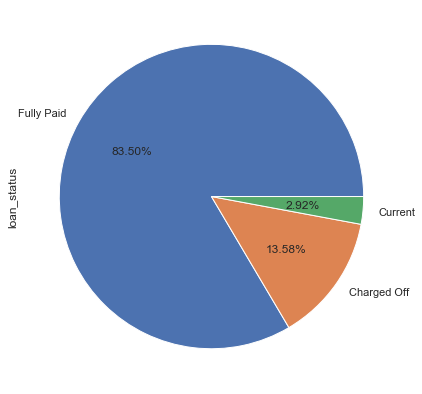

In [92]:
loan_df['loan_status'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(7,7)) # pie chart with values percentage.

In [93]:
loan_df.shape

(36489, 38)

###### We can see that about 83% of loans are fully paid and 14% of loans got charged off.  3% of loans are in current state which means 3% of loans are in ongoing state.  We will remove the rows with loan status 'current', becuase we dont need that loan status for analalysis.
        i.e. we're only intrested in loan will get fully paid or charged off.  

### <font color = 'red'> New Learn : </font> 
                'Removeing rows by conditions on column values'( Using dataframe.index)
                example: 
                        indexNames = loan_df[loan_df['loan_status'] == 'Current'].index
                        
                        It will give an index object containgng lables for which column 'loan_status' has value 'Current'
                
        After passing 'indexNames' to dataframe.drop() it'll remove all the rows for which 'loan_status' value is 'Current'.
        
We can use either of following code snippets to remove.

In [94]:
#indexNames = loan_df[loan_df['loan_status'] == 'Current'].index
#loan_df.drop(indexNames)

In [95]:
indexNames = loan_df.loc[loan_df['loan_status'] == 'Current'].index
loan_df.drop(indexNames,inplace = True)

In [96]:
loan_df['loan_status'].unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

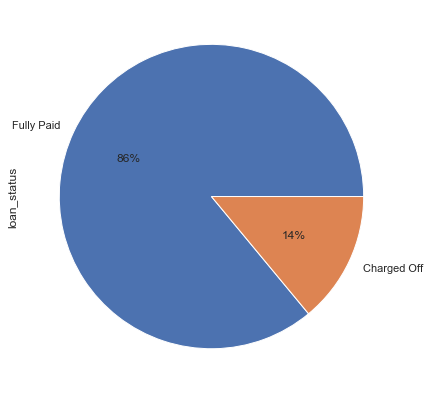

In [97]:
loan_df['loan_status'].value_counts().plot.pie(autopct='%1.f%%',figsize=(7,7))

###### Now we can see that 86% of loans are fully paid and 14% of loans got charged off.  The percentage of fully paid is very high that of the charged off.

In [98]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,35422.0,11127.755350,7326.008328,500.00,5500.000000,10000.000000,15000.00000,3.500000e+04
installment,35422.0,323.893037,207.140656,16.08,167.730000,280.280000,426.47000,1.305190e+03
annual_inc,35422.0,69058.185520,63933.418971,4000.00,41400.000000,60000.000000,82431.00000,6.000000e+06
dti,35422.0,13.401904,6.637969,0.00,8.320000,13.500000,18.64000,2.999000e+01
delinq_2yrs,35422.0,0.146350,0.493123,0.00,0.000000,0.000000,0.00000,1.100000e+01
inq_last_6mths,35422.0,0.866806,1.064260,0.00,0.000000,1.000000,1.00000,8.000000e+00
open_acc,35422.0,9.330077,4.374957,2.00,6.000000,9.000000,12.00000,4.400000e+01
pub_rec,35422.0,0.054288,0.236107,0.00,0.000000,0.000000,0.00000,4.000000e+00
revol_bal,35422.0,13357.790921,15670.685171,0.00,3776.250000,8922.000000,17055.50000,1.495880e+05
total_acc,35422.0,22.202868,11.403339,2.00,14.000000,21.000000,29.00000,9.000000e+01


# 3) Outlier  Analysis

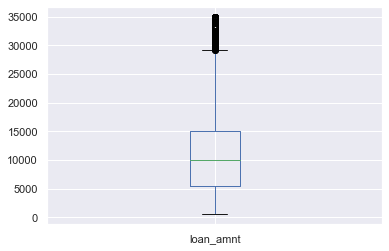

In [99]:
loan_df['loan_amnt'].plot.box()

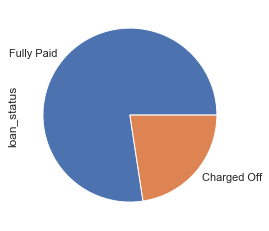

In [100]:
loan_df[loan_df['loan_amnt']>29000]['loan_status'].value_counts().plot.pie()

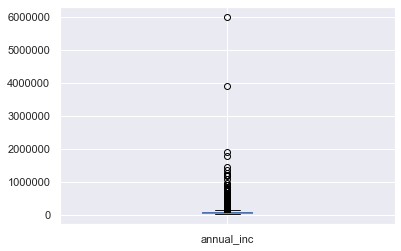

In [101]:
loan_df['annual_inc'].plot.box()

In [102]:
len(loan_df[loan_df['annual_inc']>1000000])#['loan_status']

13

In [103]:
loan_df['revol_bal'].max()

149588

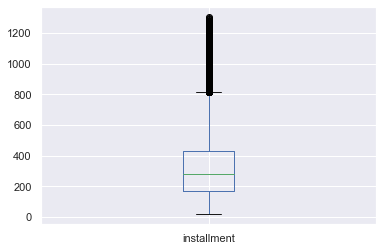

In [104]:
loan_df['installment'].plot.box()

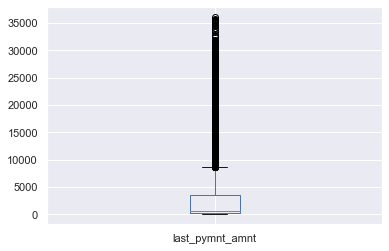

In [105]:
loan_df['last_pymnt_amnt'].plot.box()

In [106]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,35422.0,11127.755350,7326.008328,500.00,5500.000000,10000.000000,15000.00000,3.500000e+04
installment,35422.0,323.893037,207.140656,16.08,167.730000,280.280000,426.47000,1.305190e+03
annual_inc,35422.0,69058.185520,63933.418971,4000.00,41400.000000,60000.000000,82431.00000,6.000000e+06
dti,35422.0,13.401904,6.637969,0.00,8.320000,13.500000,18.64000,2.999000e+01
delinq_2yrs,35422.0,0.146350,0.493123,0.00,0.000000,0.000000,0.00000,1.100000e+01
inq_last_6mths,35422.0,0.866806,1.064260,0.00,0.000000,1.000000,1.00000,8.000000e+00
open_acc,35422.0,9.330077,4.374957,2.00,6.000000,9.000000,12.00000,4.400000e+01
pub_rec,35422.0,0.054288,0.236107,0.00,0.000000,0.000000,0.00000,4.000000e+00
revol_bal,35422.0,13357.790921,15670.685171,0.00,3776.250000,8922.000000,17055.50000,1.495880e+05
total_acc,35422.0,22.202868,11.403339,2.00,14.000000,21.000000,29.00000,9.000000e+01


In [107]:
Q1 = loan_df.quantile(0.25)
#Q1['annual_inc']
Q3 = loan_df.quantile(0.75)

IQR = Q3 - Q1

IQR


loan_amnt                   9500.000000
installment                  258.740000
annual_inc                 41031.000000
dti                           10.320000
delinq_2yrs                    0.000000
inq_last_6mths                 1.000000
open_acc                       6.000000
pub_rec                        0.000000
revol_bal                  13279.250000
total_acc                     15.000000
out_prncp                      0.000000
out_prncp_inv                  0.000000
total_pymnt                10694.432836
total_pymnt_inv            10297.670000
total_rec_prncp             8774.210000
total_rec_int               2059.925000
total_rec_late_fee             0.000000
recoveries                     0.000000
collection_recovery_fee        0.000000
last_pymnt_amnt             3376.687500
pub_rec_bankruptcies           0.000000
dtype: float64

In [108]:
Q3['loan_amnt'] + IQR['loan_amnt'] * 1.5

29250.0

In [109]:
IQR['loan_amnt']*1.5 - Q1['loan_amnt']

8750.0

### Defining Function For Imputing Outliers.

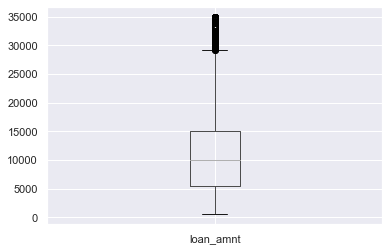

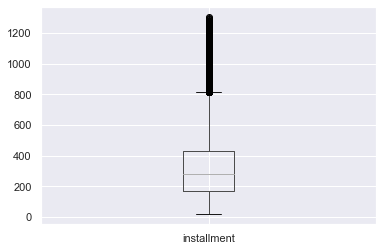

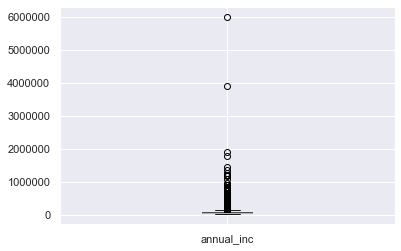

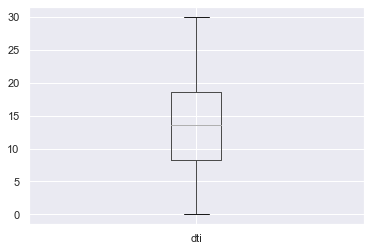

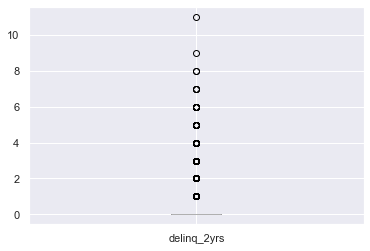

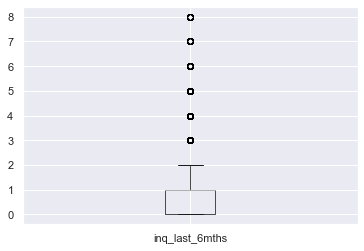

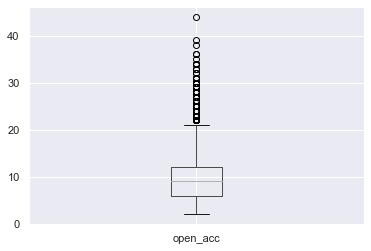

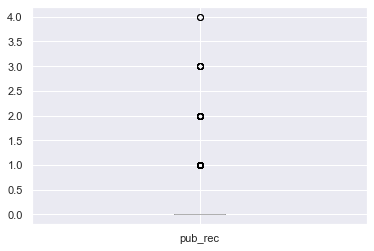

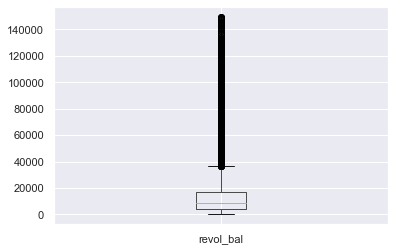

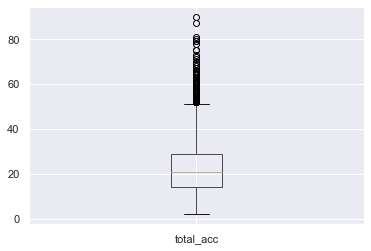

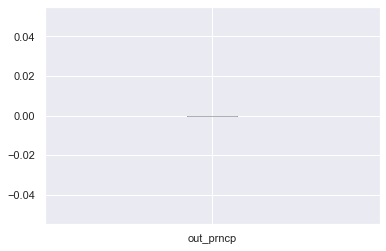

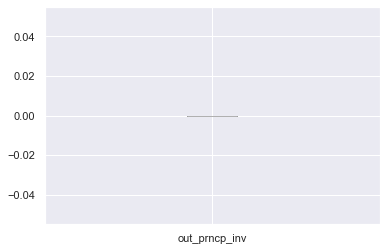

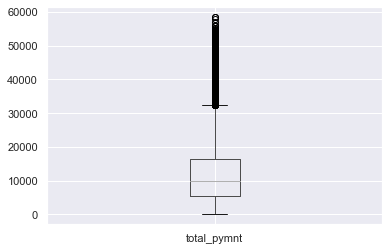

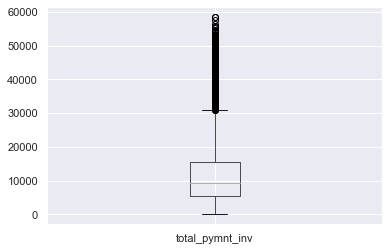

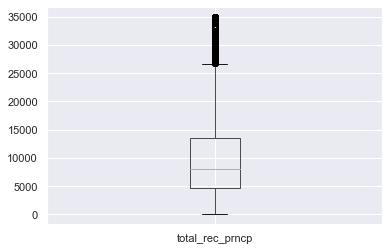

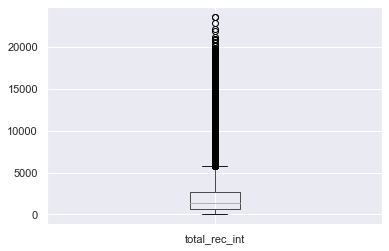

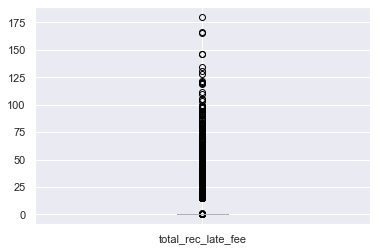

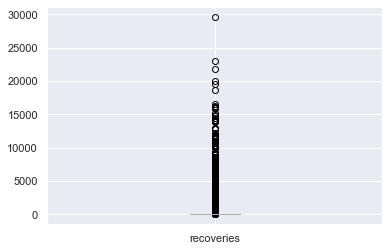

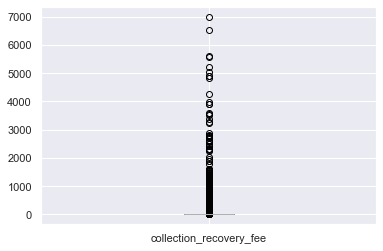

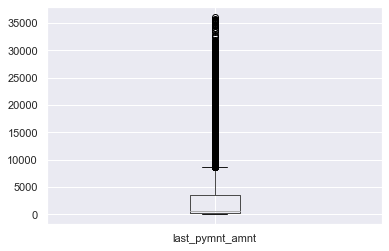

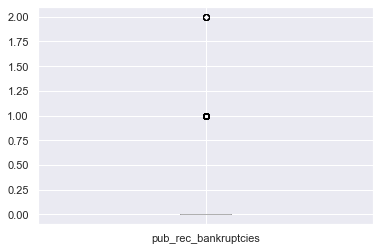

In [110]:
for col in loan_df.select_dtypes(include=['float64','int64']).columns:
    loan_df[[col]].boxplot()
    plt.show()

######  Creating list of columns for imputing outliers based on their bar plots.

In [111]:
# List of columns for imputing outliers
imp_list = ['loan_amnt','installment','open_acc','revol_bal','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','last_pymnt_amnt']

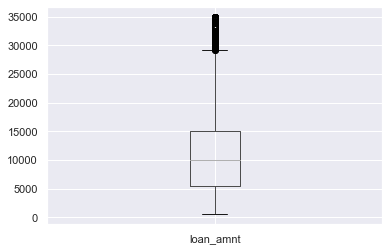

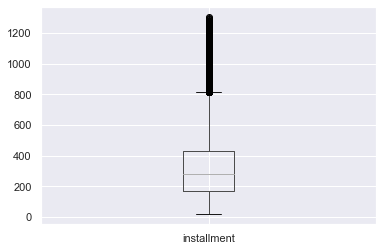

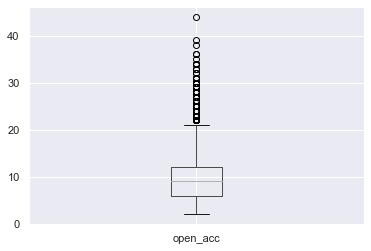

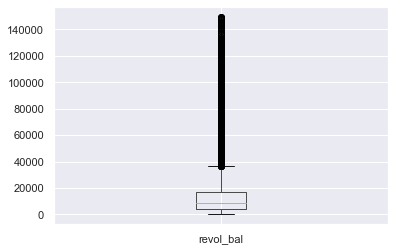

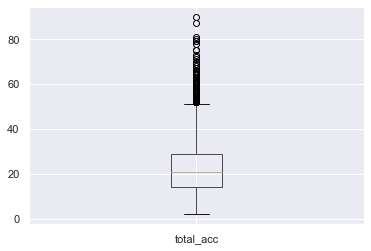

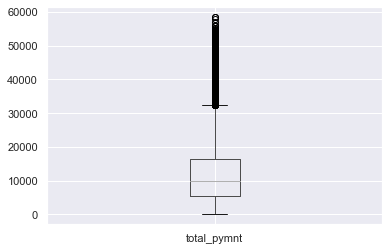

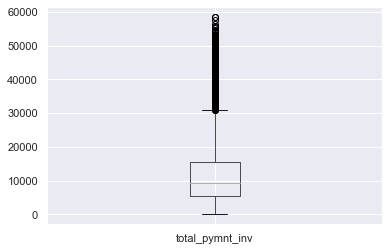

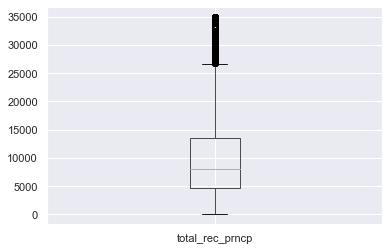

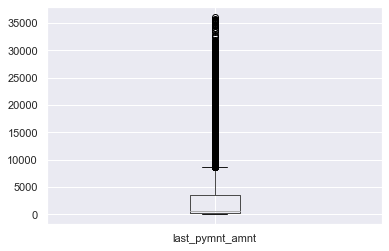

In [112]:
# Boxplot for columns selcted for imputing outliers.
for col in loan_df[imp_list].select_dtypes(include=['float64','int64']).columns:
    loan_df[[col]].boxplot()
    plt.show()

###### Defining Function for Imputing Outliers:
        All the outliers for selected columns lies above (Q3 + 1.5*IQR). So we will make a function to impute those outliers.

In [113]:
# Function for imputing outliers.
def imp_out(Q1,Q3,IQR,col,df):
    df.loc[ (df[col] > (1.5*IQR[col] + Q3[col])), col] = IQR[col]*1.5 - Q3[col]


In [114]:
for col in imp_list:
    imp_out(Q1,Q3,IQR,col,loan_df)

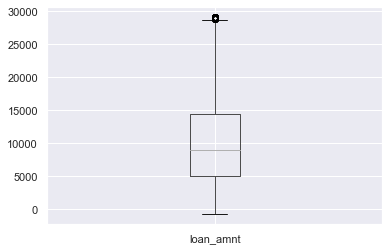

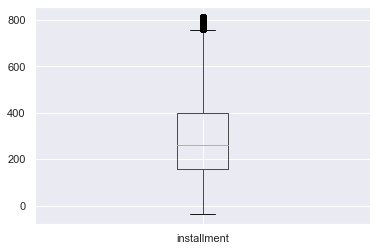

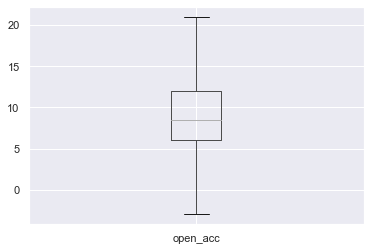

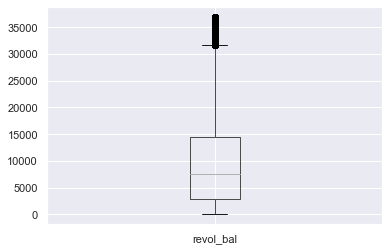

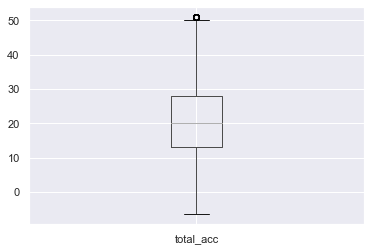

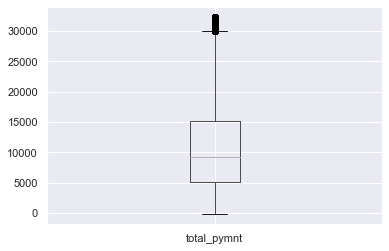

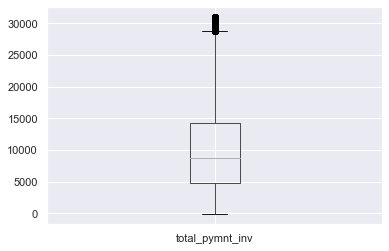

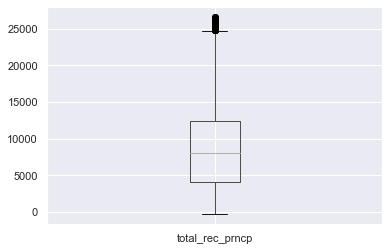

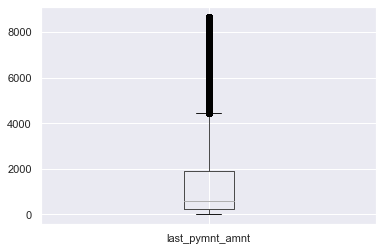

In [115]:
for col in loan_df[imp_list].select_dtypes(include=['float64','int64']).columns:
    loan_df[[col]].boxplot()
    plt.show()

# Data Manipulation

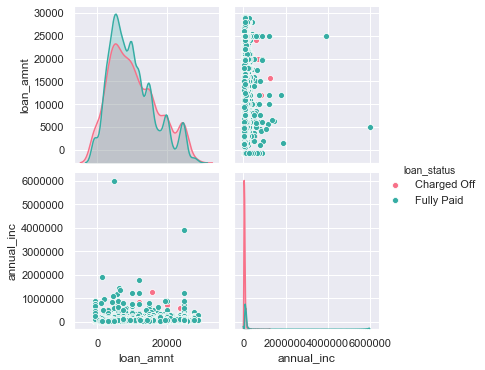

In [116]:
sns.pairplot(loan_df[['loan_status','loan_amnt','annual_inc','purpose']], hue='loan_status', height = 2.5, palette="husl");

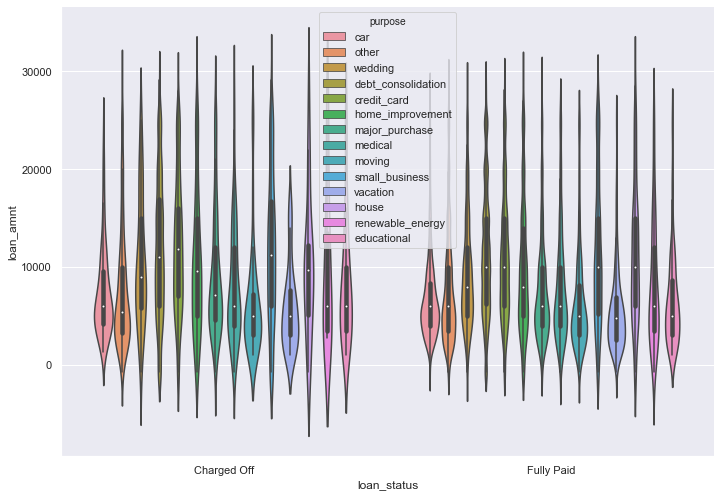

In [117]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.violinplot(y='loan_amnt',x='loan_status', data=loan_df, hue='purpose',)
sns.despine()

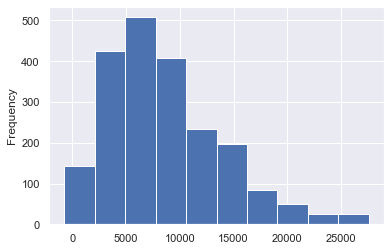

In [118]:
loan_df[(loan_df['loan_status'] == 'Charged Off') & (loan_df['annual_inc']<50000)]['loan_amnt'].plot.hist()

In [119]:
loan_df['loan_status'].unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

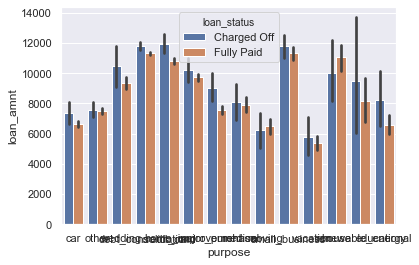

In [120]:
sns.barplot(x='purpose', y='loan_amnt', hue="loan_status", data=loan_df)

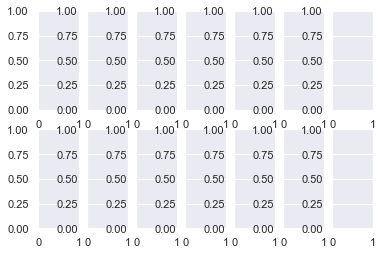

In [122]:
f ,ax = plt.subplots(ncols = 7, nrows = 2)

In [124]:
'''import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = data[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')'''

"import matplotlib.pyplot as plt\nplt.figure(figsize=(20, 5))\n\n# i: index\nfor i, col in enumerate(features.columns):\n    # 3 plots here hence 1, 3\n    plt.subplot(1, 3, i+1)\n    x = data[col]\n    y = prices\n    plt.plot(x, y, 'o')\n    # Create regression line\n    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))\n    plt.title(col)\n    plt.xlabel(col)\n    plt.ylabel('prices')"

In [ ]:
#plt.style.use('classic')
#plt.style.use(''dark_background')

In [ ]:
##group_by